In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# creating a yahoo finance API for bitcoin and fetch 3 months of price history
btc = yf.Ticker("BTC-USD")
hist = btc.history(period="3mo")

''' hist = btc.history(
    start="2023-01-01",
    end="2023-05-01",
    interval="1d"
) '''

'''eth = yf.Ticker("ETH-USD")
hist = eth.history(period="3mo")'''

trend_line = []                         # empty list to store trend lines
curr_start = hist.index[0]              # start date of currernt trend
curr_price = hist['Close'].iloc[0]      # starting price of trend line
curr_direction = None                   # 1 for up, -1 for down

# getting lowest and highest price in dataset and calculating threshold
min_price = hist['Close'].min()
max_price = hist['Close'].max()
threshold = (max_price - min_price) / 17.5

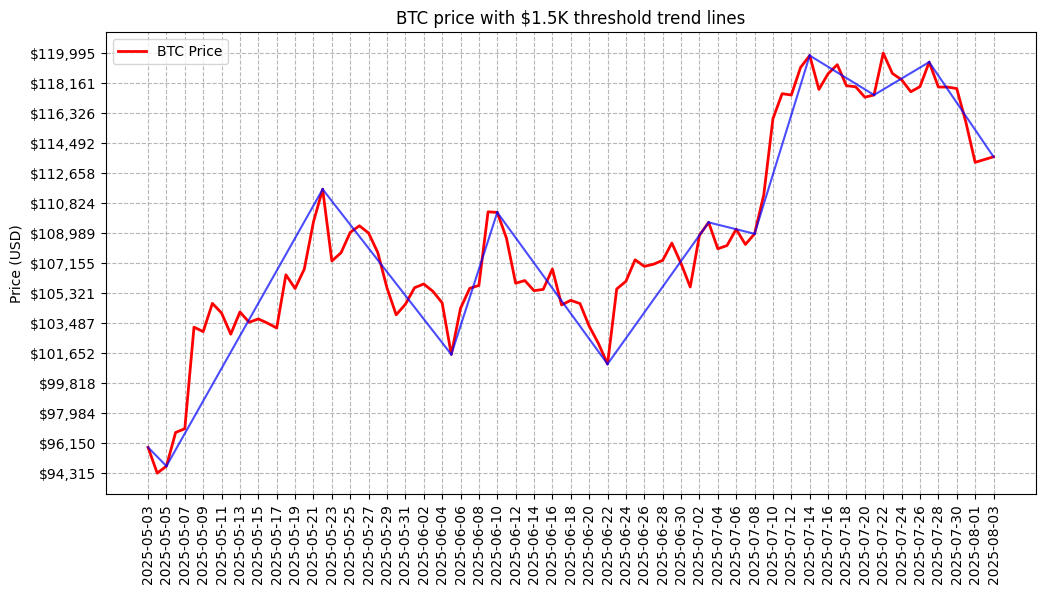

In [ ]:
# creating a plot and ploting bitcoin closing prices in red
plt.figure(figsize=(12,6))
plt.plot(hist.index, hist['Close'], color='red', linewidth=2, label='BTC Price')


for i in range (1, len(hist)):
    # iterates through each day's price change
    price_change = hist['Close'].iloc[1] - hist['Close'].iloc[i-1]

    # setting trend direction if undefined
    # going up or down?
    if curr_direction is None:
        if price_change > 0:
            curr_direction = 1
        elif price_change < 0:
            curr_direction = -1
    else:
        # if trend line is going upwards and price starts going down
        if (curr_direction == 1 and price_change < 0):
            # if price change is more than threshold draw that trend line 
            if (hist['Close'].iloc[i-1] - hist['Close'].iloc[i]) > threshold:
                trend_line.append((curr_start, hist.index[i-1], curr_price, hist['Close'].iloc[i-1]))

                curr_start = hist.index[i-1]            # reset starting point
                curr_price = hist['Close'].iloc[i-1]    # reset stating price for next trend line
                curr_direction = -1                     # switch direction

        # same as above 
        elif (curr_direction == -1, price_change > 0):
            if (hist['Close'].iloc[i] - hist['Close'].iloc[i-1]) > threshold:
                trend_line.append((curr_start, hist.index[i-1], curr_price, hist['Close'].iloc[i-1]))

                curr_start = hist.index[i-1]
                curr_price = hist['Close'].iloc[i-1]
                curr_direction = 1

# checks if the start of the current trend is not the last date which means there's an unfinished trend line
# adds the last trend line to my trend_line list
if curr_start != hist.index[-1]:
    trend_line.append((curr_start, hist.index[-1], curr_price, hist['Close'].iloc[-1]))


# plotting trend lines - draw blue lines for each segment
for start, end, start_price, end_price in trend_line:
    plt.plot([start, end], [start_price, end_price], 'b-', linewidth=1.5, alpha=0.7)


# creates 15 evenly spaced price levels with '$' and commas
price_ticks = np.linspace(min_price, max_price, num=15)
plt.yticks(price_ticks, [f"${int(x):,}" for x in price_ticks])


# show x-axis labels every 2 days and rotates them for readability
plt.xticks(
    pd.date_range(start=hist.index[0], end=hist.index[-1], freq='2D'),
    rotation=90
)


plt.title("BTC price with $1.5K threshold trend lines")
plt.ylabel("Price (USD)")
plt.grid(True, linestyle='--', alpha=0.9)
plt.legend()
plt.show()